In [18]:
# Kerakli kutubxonalarni import qilish
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

In [19]:
# Iris datasetini yuklash
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

In [20]:
# Ma'lumotlarni DataFrame ga aylantirish (vizualizatsiya uchun qulay)
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

In [21]:
# 1. Ma'lumotlarni oldindan ishlov berish
# Xususiyatlarni standartlashtirish (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Ma'lumotlarni o'quv va test to'plamlariga bo'lish
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [23]:
# 2. Logistic Regression modelini sozlash va GridSearchCV bilan optimallashtirish
base_model = LogisticRegression(multi_class='ovr', max_iter=200)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}
grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=200, multi_class='ovr'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [24]:
# Eng yaxshi modelni olish
best_model = grid_search.best_estimator_
print("Eng yaxshi parametrlar:", grid_search.best_params_)
print("Eng yaxshi CV aniqligi:", grid_search.best_score_)

Eng yaxshi parametrlar: {'C': 100, 'solver': 'lbfgs'}
Eng yaxshi CV aniqligi: 0.95


In [25]:
# 3. Test to'plamida bashorat qilish
y_pred = best_model.predict(X_test)

In [26]:
# 4. Modelni baholash
# Aniqlik (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest to'plami aniqligi: {accuracy * 100:.2f}%")


Test to'plami aniqligi: 100.00%


In [27]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [28]:
# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))



Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



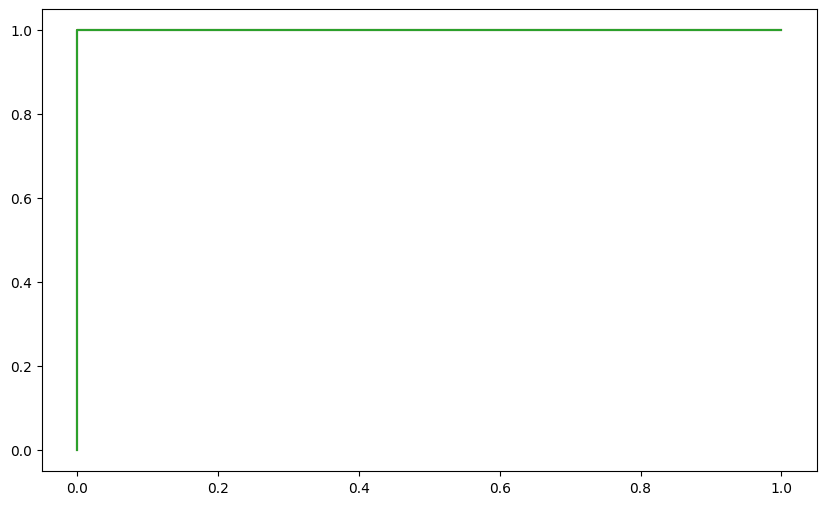

In [29]:

# 5. ROC Curve (One-vs-Rest uchun)
plt.figure(figsize=(10, 6))
for i in range(len(class_names)):
    # One-vs-Rest ROC curve
    y_test_bin = (y_test == i).astype(int)
    y_score = best_model.predict_proba(X_test)[:, i]
    fpr, tpr, _ = roc_curve(y_test_bin, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {class_names[i]}) (AUC = {roc_auc:.2f})')


<ipython-input-30-3788391d01ce>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


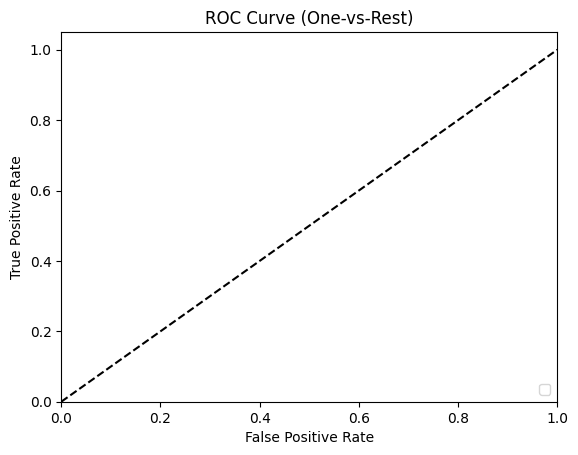

In [30]:

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

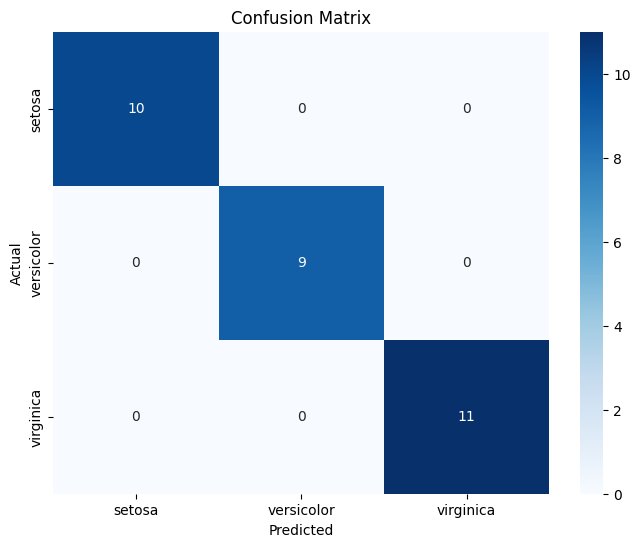

In [31]:
# 6. Confusion Matrix vizualizatsiyasi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [32]:
# 7. Xususiyatlarning ahamiyatini tahlil qilish (coefficients)
coef = best_model.coef_
for i, class_name in enumerate(class_names):
    print(f"\nClass {class_name} uchun koeffitsientlar:")
    for feature, weight in zip(iris.feature_names, coef[i]):
        print(f"{feature}: {weight:.4f}")


Class setosa uchun koeffitsientlar:
sepal length (cm): -1.5946
sepal width (cm): 2.2195
petal length (cm): -4.3411
petal width (cm): -3.7380

Class versicolor uchun koeffitsientlar:
sepal length (cm): 0.0509
sepal width (cm): -1.2663
petal length (cm): 1.7419
petal width (cm): -1.7673

Class virginica uchun koeffitsientlar:
sepal length (cm): -1.2368
sepal width (cm): -2.2838
petal length (cm): 10.0223
petal width (cm): 8.8712
